In [96]:
import glob, os, sys

sys.path.append("./opmap/")

from videoData import VideoData
from vmemMap import VmemMap

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

In [17]:
!ls /Project/15.TMDU_optical/ExperimentData/20191224/

s637a#150918-011(0).rsd  s637a#150918-011(4).rsd  s637a#150918-011.rsh
s637a#150918-011(1).rsd  s637a#150918-011(5).rsd  s637a#150918-011.rsm
s637a#150918-011(2).rsd  s637a#150918-011(6).rsd
s637a#150918-011(3).rsd  s637a#150918-011(7).rsd


In [18]:
!cat /Project/15.TMDU_optical/ExperimentData/20191224/s637a\#150918-011.rsh

In [28]:
src_dir = "/Project/15.TMDU_optical/ExperimentData/20191224/"
dst_dir = "/Project/15.TMDU_optical/AnalysisResult/20191224/"

In [20]:
rsd_files = sorted(glob.glob(src_dir+"*.rsd"))
rsd_files

['/Project/15.TMDU_optical/ExperimentData/20191224/s637a#150918-011(0).rsd',
 '/Project/15.TMDU_optical/ExperimentData/20191224/s637a#150918-011(1).rsd',
 '/Project/15.TMDU_optical/ExperimentData/20191224/s637a#150918-011(2).rsd',
 '/Project/15.TMDU_optical/ExperimentData/20191224/s637a#150918-011(3).rsd',
 '/Project/15.TMDU_optical/ExperimentData/20191224/s637a#150918-011(4).rsd',
 '/Project/15.TMDU_optical/ExperimentData/20191224/s637a#150918-011(5).rsd',
 '/Project/15.TMDU_optical/ExperimentData/20191224/s637a#150918-011(6).rsd',
 '/Project/15.TMDU_optical/ExperimentData/20191224/s637a#150918-011(7).rsd']

In [29]:
V = None
for path in rsd_files:
    with open(path, 'r') as f:
        v = np.fromfile(f, dtype='<u2').reshape(256, 100, 128)#.reshape(256,128*100)
        v = v[:,:,20:-8]
        if V is None:
            V = v
        else:
            V = np.concatenate([V,v])

V = V[1:]

In [22]:
V.shape

(2047, 100, 100)

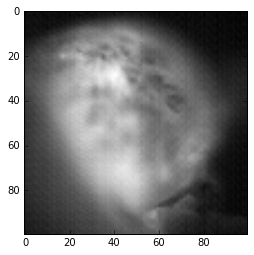

In [23]:
plt.imshow(V[40], cmap='gray')

In [40]:
(x,y) = (36, 20)

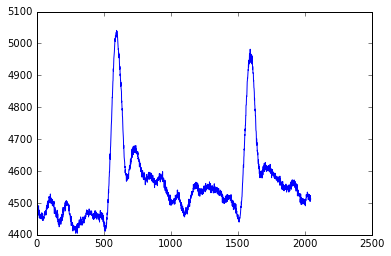

In [41]:
ts = V[:,y,x]
#ts = (ts-ts.min())/(ts.max()-ts.min())
plt.plot(ts)

In [25]:
cam = VideoData(*V.shape)
cam.data = -V

In [26]:
cam.data.shape

(2047, 100, 100)

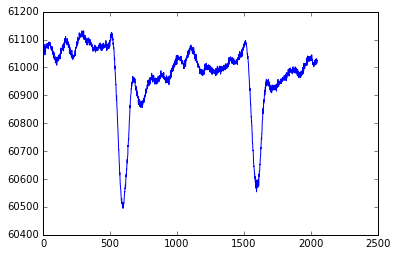

In [42]:
plt.plot(cam.data[:,y,x])

In [30]:
vmem = VmemMap(cam)

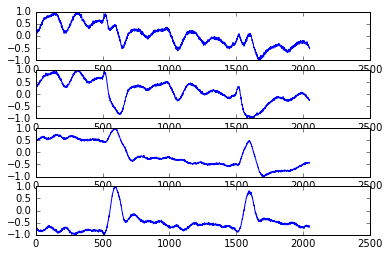

In [31]:
vmem.plot([(30,20), (32,20), (34,20), (36,20)])

In [35]:
vmem.saveImage(os.path.join(dst_dir, "vmem"))

In [172]:
samplerate = 1000
Fs = 1024
overlap = 90

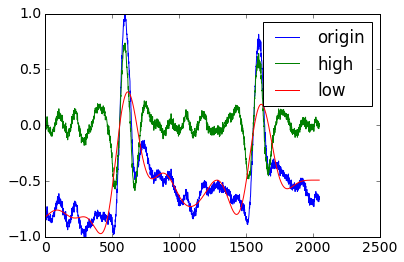

In [184]:
data = vmem.data[:,20,36]
plt.plot(data, label="origin")

# Highpass
fp = 4       #通過域端周波数[Hz]
fs = 2       #阻止域端周波数[Hz]
gpass = 3    #通過域端最大損失[dB]
gstop = 40   #阻止域端最小損失[dB]
data_filt_hp = filter_function.highpass(data, samplerate, fp, fs, gpass, gstop)
plt.plot(data_filt_hp, label="high")

# Lowpass
fp = 4       #通過域端周波数[Hz]
fs = 8       #阻止域端周波数[Hz]
gpass = 3    #通過域端最大損失[dB]
gstop = 40   #阻止域端最小損失[dB]
data_filt_lp = filter_function.lowpass(data, samplerate, fp, fs, gpass, gstop)
plt.plot(data_filt_lp, label="low")

plt.legend()

In [194]:
import copy

In [195]:
vmem_hp = copy.deepcopy(vmem)
vmem_lp = copy.deepcopy(vmem)

In [199]:
data = vmem.data
data = np.swapaxes(data, 0, 1)
data = np.swapaxes(data, 1, 2)

# Highpass
fp = 4       #通過域端周波数[Hz]
fs = 2       #阻止域端周波数[Hz]
gpass = 3    #通過域端最大損失[dB]
gstop = 40   #阻止域端最小損失[dB]
data_filt_hp = filter_function.highpass(data, samplerate, fp, fs, gpass, gstop)
data_filt_hp = np.swapaxes(data_filt_hp, 1, 2)
data_filt_hp = np.swapaxes(data_filt_hp, 0, 1)
vmem_hp.data = data_filt_hp

# Lowpass
fp = 4       #通過域端周波数[Hz]
fs = 8       #阻止域端周波数[Hz]
gpass = 3    #通過域端最大損失[dB]
gstop = 40   #阻止域端最小損失[dB]
data_filt_lp = filter_function.lowpass(data, samplerate, fp, fs, gpass, gstop)
data_filt_lp = np.swapaxes(data_filt_lp, 1, 2)
data_filt_lp = np.swapaxes(data_filt_lp, 0, 1)
vmem_lp.data = data_filt_lp

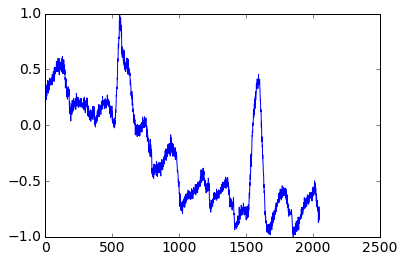

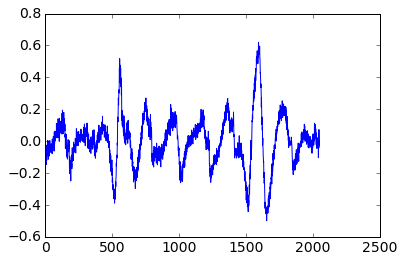

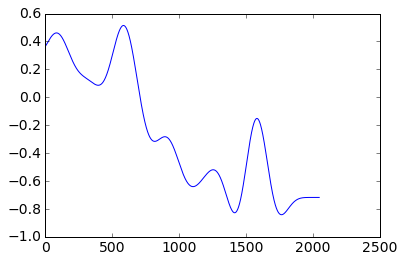

In [203]:
x, y = 36,30
vmem.plot([(x,y)])
vmem_hp.plot([(x,y)])
vmem_lp.plot([(x,y)])

In [204]:
vmem_hp.saveImage(os.path.join(dst_dir, "vmem_hp"))

In [205]:
vmem_lp.saveImage(os.path.join(dst_dir, "vmem_lp"))

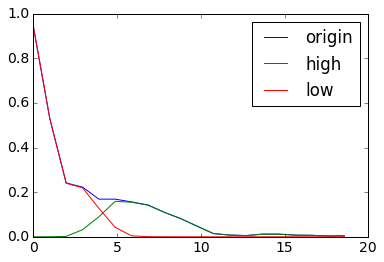

In [187]:
time_array, N_ave = fft_function.ov(data, samplerate, Fs, overlap)
time_array, acf = fft_function.hanning(time_array, Fs, N_ave)
fft_array, fft_mean, fft_axis = fft_function.fft_ave(time_array, samplerate, Fs, N_ave, acf)
plt.plot(fft_axis[:20], fft_mean[:20], label='origin', lw=1)

time_array, N_ave = fft_function.ov(data_filt_hp, samplerate, Fs, overlap)
time_array, acf = fft_function.hanning(time_array, Fs, N_ave)
fft_array, fft_mean, fft_axis = fft_function.fft_ave(time_array, samplerate, Fs, N_ave, acf)
plt.plot(fft_axis[:20], fft_mean[:20], label='high', lw=1)

time_array, N_ave = fft_function.ov(data_filt_lp, samplerate, Fs, overlap)
time_array, acf = fft_function.hanning(time_array, Fs, N_ave)
fft_array, fft_mean, fft_axis = fft_function.fft_ave(time_array, samplerate, Fs, N_ave, acf)
plt.plot(fft_axis[:20], fft_mean[:20], label='low', lw=1)

plt.legend()